In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Datasets as D, Parsers as P, Utilities as U
from mppi.Calculators import Tools
from mppi.Datasets import PostProcessing as PP
from mppi.Utilities import Constants as Const
from mppi.Utilities import LatticeUtils as LL
import matplotlib.pyplot as plt
import numpy as np
import os, yaml

# Analysis of the DFT input file

In [3]:
inp = I.PwInput(file='qe_inp_vasil.in')
#inp = I.PwInput(file='scf.in')
inp

{'control': {'calculation': "'scf'",
  'verbosity': "'high'",
  'prefix': "'pwscf'",
  'outdir': "'./'",
  'restart_mode': "'from_scratch'",
  'wf_collect': '.false.'},
 'system': {'force_symmorphic': '.false.',
  'ibrav': 0,
  'nat': 14,
  'ntyp': 2,
  'ecutwfc': 70,
  'nbnd': 35,
  'occupations': "'fixed'",
  'degauss': 0.0,
  'smearing': "'gaussian'"},
 'electrons': {'diago_full_acc': '.false.'},
 'ions': {},
 'cell': {},
 'atomic_species': {'C': [12.011, 'C.upf'], 'H': [1.0, 'H.upf']},
 'atomic_positions': {'type': '(angstrom)',
  'values': [['C', [-1.792510823, 1.4456517994, -0.0414672295]],
   ['C', [0.6379373039, 1.4235971792, -0.3172245562]],
   ['C', [3.0657768079, 1.4455042995, -0.0157591793]],
   ['C', [-0.5959562906, 0.7133098684, -0.2503074405]],
   ['C', [1.8700368141, 0.7135148531, -0.2270262819]],
   ['C', [-3.0402753064, -0.7719313527, 0.4823609916]],
   ['H', [-3.0239104491, -1.0594331893, 1.5579425823]],
   ['C', [-0.5959562909, -0.7133098686, -0.2503074405]],
   ['C

In [4]:
atoms = inp['atomic_positions']['values'] # provided in angstrom

In [5]:
cell_parameters = inp['cell_parameters']['values']
lattice = np.array([cell_parameters[0],cell_parameters[1],cell_parameters[2]])

In [6]:
lattice

array([[7.36358849e+00, 1.00000000e-06, 0.00000000e+00],
       [1.00000000e-09, 4.27265581e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.20000000e+01]])

In [23]:
positions = LL.build_lattice(lattice,atoms,1,1,1)

In [24]:
atoms[0][1]

[-1.792510823, 1.4456517994, -0.0414672295]

Text(0.5, 1.0, 'Atomic positions in the xy plane')

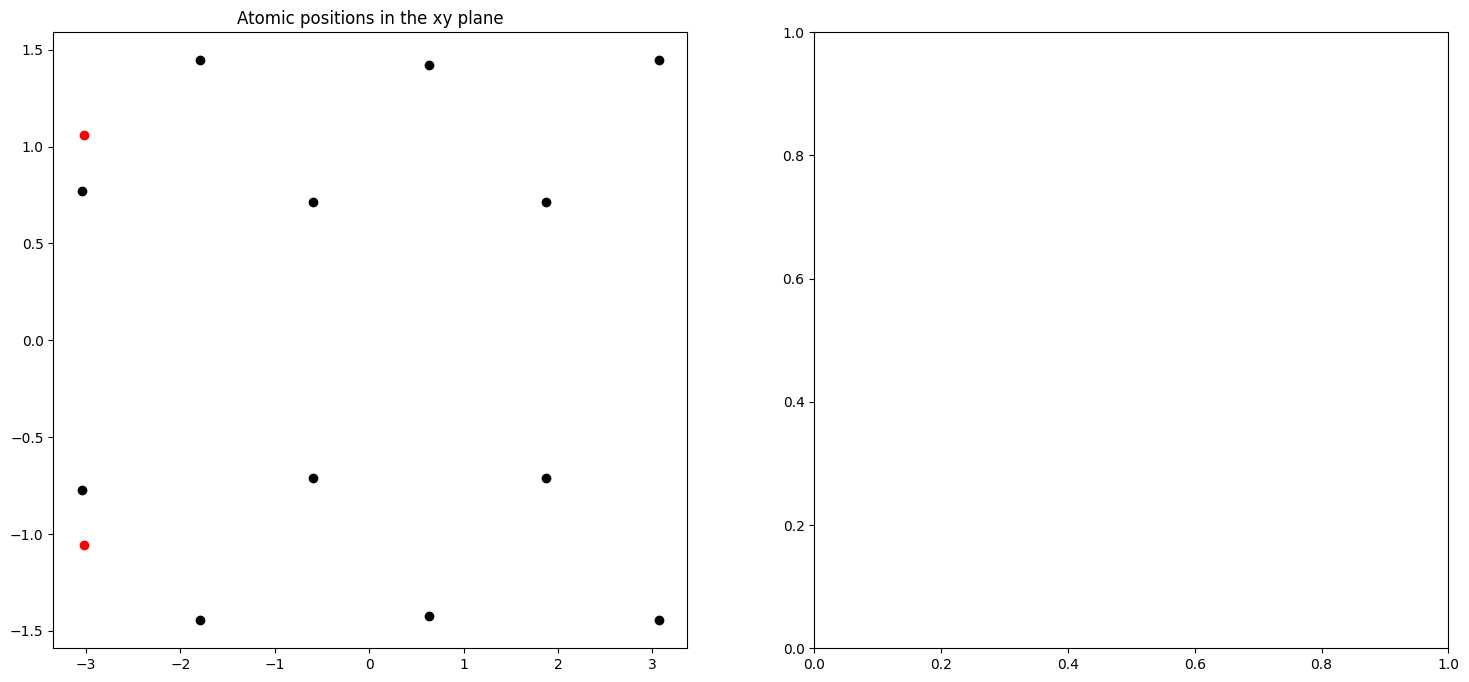

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))

for at in atoms:
    if at[0] == 'C': color = 'black'
    if at[0] == 'H': color = 'red'
    pos = at[1]
    ax[0].scatter(pos[0],pos[1],color=color)
ax[0].set_title('Atomic positions in the xy plane',size=12)


Text(0.5, 1.0, 'Atomic positions in the xz plane')

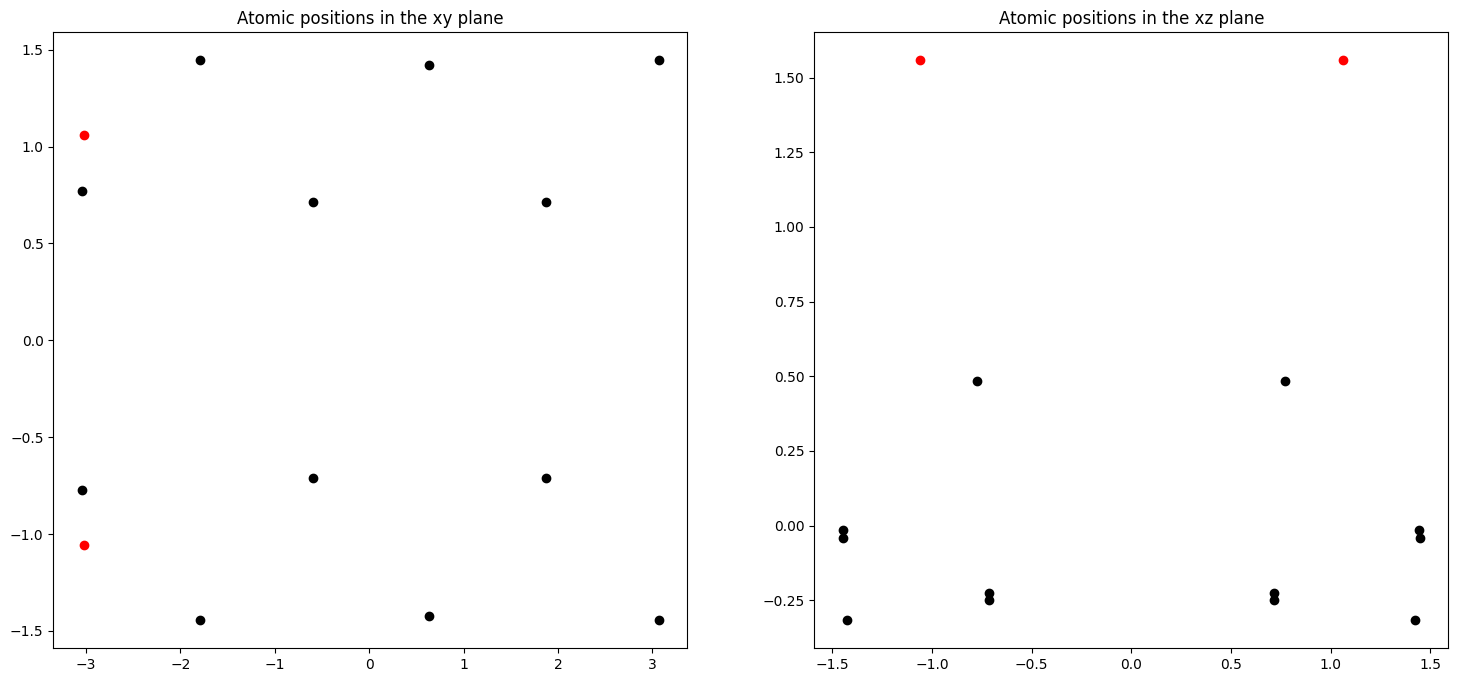

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))

for at in positions:
    if at[0] == 'C': color = 'black'
    if at[0] == 'H': color = 'red'
    ax[0].scatter(at[1],at[2],color=color)
ax[0].set_title('Atomic positions in the xy plane',size=12)


for at in positions:
    if at[0] == 'C': color = 'black'
    if at[0] == 'H': color = 'red'
    ax[1].scatter(at[2],at[3],color=color)
ax[1].set_title('Atomic positions in the xz plane',size=12)


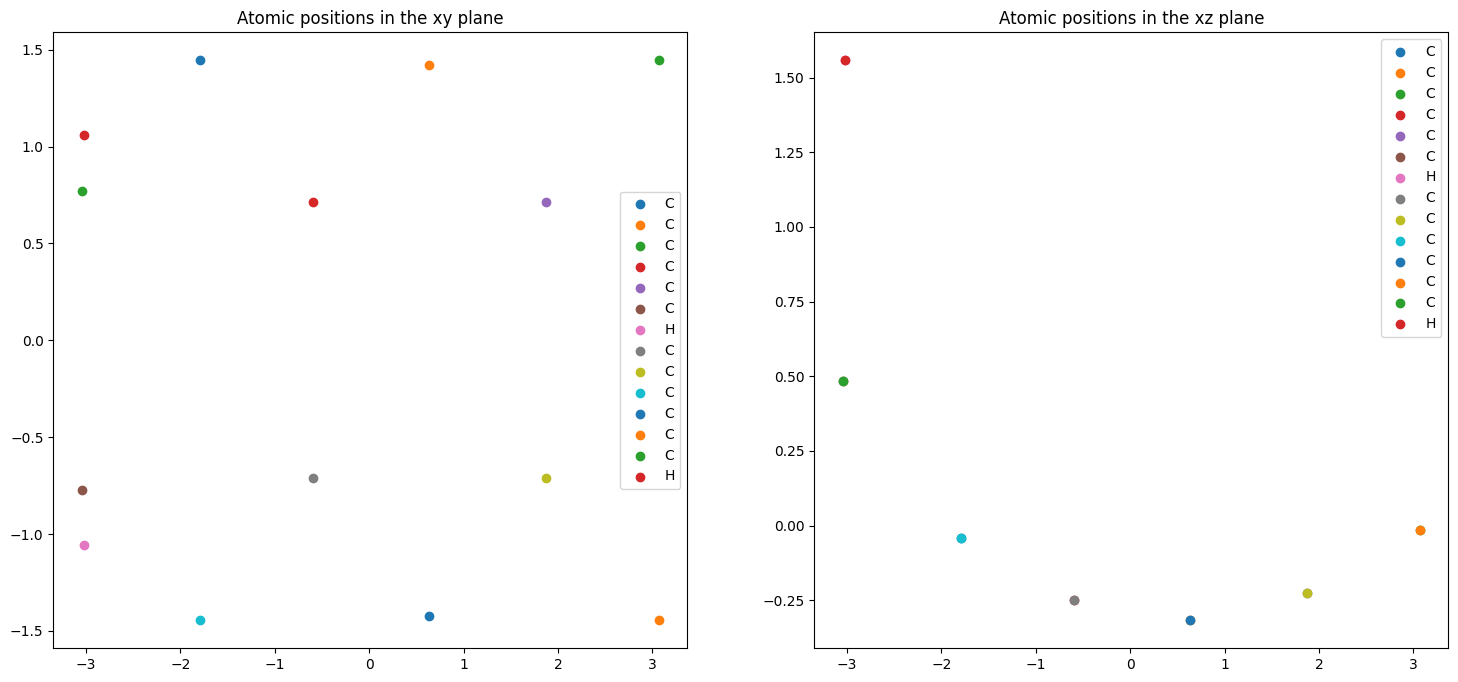

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))

for pos in positions:
    ax[0].scatter(pos[1],pos[2],label=pos[0])
ax[0].set_title('Atomic positions in the xy plane',size=12)
ax[0].legend()

for pos in positions:
    ax[1].scatter(pos[1],pos[3],label=pos[0])
ax[1].set_title('Atomic positions in the xz plane',size=12)
ax[1].legend()


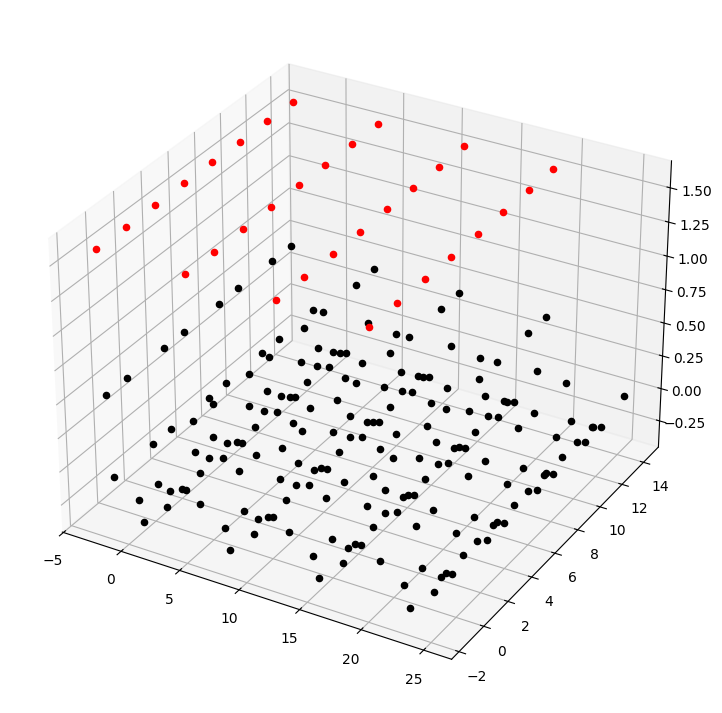

In [65]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

for at in positions:
    if at[0] == 'C': color = 'black'
    if at[0] == 'H': color = 'red'
    for x,y,z in zip(at[1],at[2],at[3]):
        ax.scatter3D(x,y,z,color=color)